#### Linear Regression model using `PyTorch`

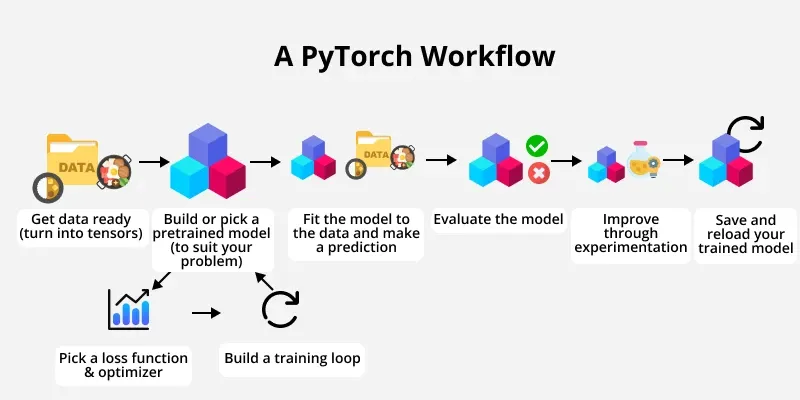

In [ ]:
import torch, matplotlib.pyplot as plt
from torch import nn # nn - Neural Network Module

In [ ]:
x = torch.arange(0, 1, 0.02, dtype=torch.float32).unsqueeze(dim=1)
y = 0.7 * x + 0.3 # Known params

In [ ]:
len(x), len(y)

(50, 50)

In [ ]:
Xtrain, Xtest, ytrain, ytest = x[:40], x[40:], y[:40], y[40:]
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [ ]:
def plot_predictions(X_train = Xtrain, y_train = ytrain, X_test = Xtest, y_test = ytest,
                     predictions = None):

    plt.scatter(X_train, y_train, c='r', s=10)
    plt.scatter(X_test, y_test, c='g', s=10)

    if predictions is not None:
        plt.scatter(predictions, y_test, c='b', s=10)

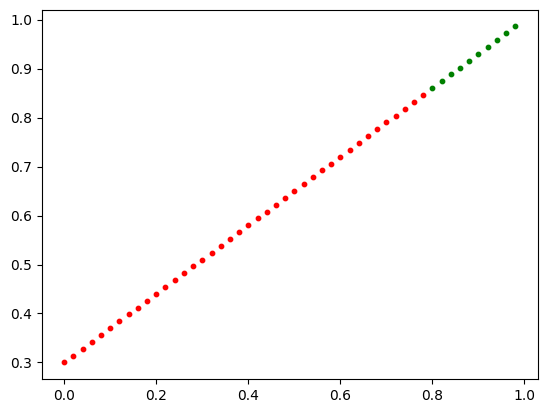

In [ ]:
plot_predictions()

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(in_features=1, out_features=1) # nn.Linear has the function of 'y = mx + b'

    def forward(self, x):
        return self.linear(x)

In [ ]:
torch.manual_seed(42)

model = LinearRegression()
print(f'params {model.state_dict()}')

params OrderedDict({'linear.weight': tensor([[0.7645]]), 'linear.bias': tensor([0.8300])})


In [ ]:
with torch.inference_mode(): # Making our model to prediction stage
    ypred = model(Xtest)

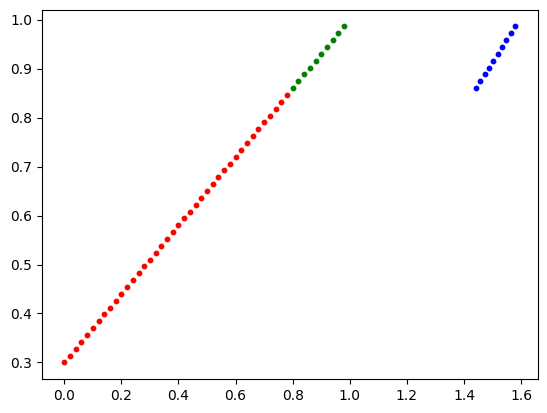

In [ ]:
plot_predictions(predictions=ypred)

In [ ]:
loss = nn.L1Loss() # L1Loss == Mean Absolute Error
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # SGD == Stochastic Gradient Descent

In [ ]:
epochs = 110
epoch_count = []
training_loss = []
testing_loss = []

for epoch in range(epochs):
    # Put model in training mode
    model.train()
    # Compute forward pass
    ytrain_pred = model(Xtrain)
    # Compute loss
    train_loss = loss(ytrain_pred, ytrain)
    # Make gradients zero for avoiding accumulation
    optimizer.zero_grad()
    # Backpropagate
    train_loss.backward()
    # Update w, b
    optimizer.step()
    # Put the model in evaluation mode to avoid keep tracking
    model.eval()
    # Finally inference_mode for prediction
    with torch.inference_mode():
        # Compute forward pass
        ytest_pred = model(Xtest)
        # Compute testing loss
        test_loss = loss(ytest_pred, ytest.type(torch.float32))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            training_loss.append(train_loss.detach().numpy())
            testing_loss.append(test_loss.detach().numpy())
            print(f'Epoch {epoch} | Train Loss {train_loss} | Test Loss {test_loss}')
            print(f'params {model.state_dict()}\n')

Epoch 0 | Train Loss 0.5551779866218567 | Test Loss 0.5739762187004089
params OrderedDict({'linear.weight': tensor([[0.7606]]), 'linear.bias': tensor([0.8200])})

Epoch 10 | Train Loss 0.4399680495262146 | Test Loss 0.4392663538455963
params OrderedDict({'linear.weight': tensor([[0.7216]]), 'linear.bias': tensor([0.7200])})

Epoch 20 | Train Loss 0.3247582018375397 | Test Loss 0.30455657839775085
params OrderedDict({'linear.weight': tensor([[0.6826]]), 'linear.bias': tensor([0.6200])})

Epoch 30 | Train Loss 0.20954827964305878 | Test Loss 0.16984674334526062
params OrderedDict({'linear.weight': tensor([[0.6436]]), 'linear.bias': tensor([0.5200])})

Epoch 40 | Train Loss 0.09433844685554504 | Test Loss 0.03513689711689949
params OrderedDict({'linear.weight': tensor([[0.6046]]), 'linear.bias': tensor([0.4200])})

Epoch 50 | Train Loss 0.023886386305093765 | Test Loss 0.04784906655550003
params OrderedDict({'linear.weight': tensor([[0.5872]]), 'linear.bias': tensor([0.3525])})

Epoch 60 

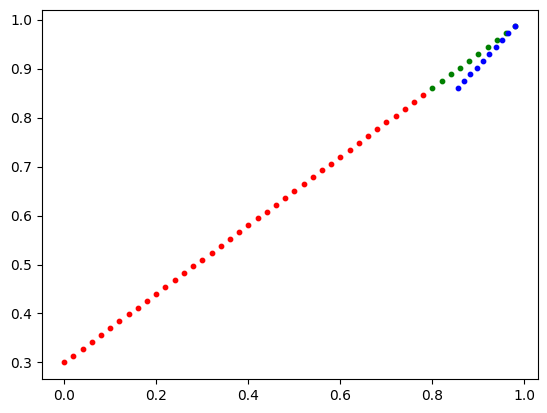

In [ ]:
plot_predictions(predictions=ytest_pred)

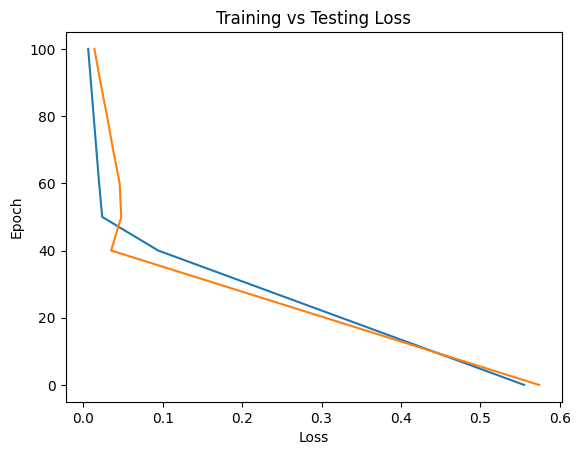

In [ ]:
plt.plot(training_loss, epoch_count)
plt.plot(testing_loss, epoch_count)
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.title('Training vs Testing Loss')
plt.show()